# The 911 calls data analysis practice

This project will be analyzing the 911 dataset from [Kaggle](https://www.kaggle.com/mchirico/montcoalert) and try to find some sort of insights in the data. And most importantly practice some data analysis libraries in python.

First step, import the numpy, pandas, and visualization tools

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

set the notebook to display plot in line

In [74]:
%matplotlib inline

Then, Read in the csv file, and store it as df

In [75]:
df = pd.read_csv('911.csv')

Check the overall information about the data,like the data type for each column.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


From the info we can find that the total entries is 99492 and the 'zip' column has the most null value followed by 'addr' and 'twp'.

Now let's look into the real data:

In [11]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Then we can ask some basic questions, what is the top five Township for making 911 calls

In [13]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

What is the top five address for the 911 calls

In [20]:
df['addr'].value_counts().head()

SHANNONDELL DR & SHANNONDELL BLVD    938
MAIN ST & OLD SUMNEYTOWN PIKE        390
THE FAIRWAY  & RYDAL RD              260
GULPH RD & KIRK AVE                  235
EVERGREEN RD & W LIGHTCAP RD         232
Name: addr, dtype: int64

How many Townships are there in total?

In [43]:
df['addr'].nunique()

21914

What is the top five title for 'LOWER MERION' town?

In [44]:
df[df['twp'] == 'LOWER MERION']['title'].value_counts().head()

Traffic: VEHICLE ACCIDENT -    2324
Traffic: DISABLED VEHICLE -     787
Fire: FIRE ALARM                772
Traffic: ROAD OBSTRUCTION -     406
EMS: VEHICLE ACCIDENT           350
Name: title, dtype: int64

We can see that lots of traffic report happened so, what are the top five addresses for this?

In [45]:
df[df['twp'] == 'LOWER MERION']['addr'].value_counts().head()

SCHUYLKILL EXPY & CONSHOHOCKEN STATE UNDERPASS    172
CITY AVE & HOLLINGSWORTH RD                       160
SCHUYLKILL EXPY & WAVERLY RD UNDERPASS            151
LANCASTER AVE & LANKENAU DR                       137
LANCASTER AVE & CHATHAM RD                         91
Name: addr, dtype: int64

What is the top five title for 911 calls?

In [21]:
df['title'].value_counts().head()

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64

If we look into the titles, we can find that the value actually contains category values, so we can try to get that information out, and add another column to analyze it.

In [77]:
#use .apply func to generate the new column
df['Category'] = df['title'].apply(lambda x:x.split(':')[0])

Now the data will be like:

In [23]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Category
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


So we an check out the most common category for 911calls:


In [24]:
df['Category'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Category, dtype: int64

And show it in the graph:

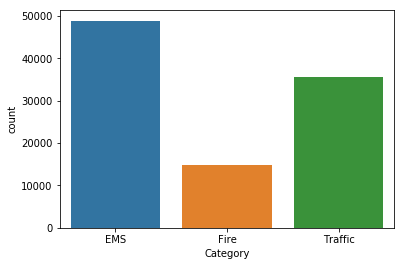

In [27]:
sns.countplot(df['Category'])

In order to analysis the data along time information, we need to analysis the 'timeStamp' value, and try to convert it to what we want.

In [78]:
#use the pd.to_datetime function
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [29]:
#check the datatype
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

Now we can extract more info from this column, such as hour, month, and day of week.

In [79]:
#create new columns for hour, month, and week.
df['hour'] = df['timeStamp'].apply(lambda x : x.hour)
df['month'] = df['timeStamp'].apply(lambda x : x.month)
df['week'] = df['timeStamp'].apply(lambda x : x.dayofweek)

In [32]:
#check the data
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Category,hour,month,week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [80]:
#change the week column into proper words like 'Thur','Mon'
weekmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [81]:
df['week'] = df['week'].map(weekmap)

In [38]:
#now check the data
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Category,hour,month,week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


Now we can check some information based on the time value.

How many 911 calls happened for each week days? and the Category for that?


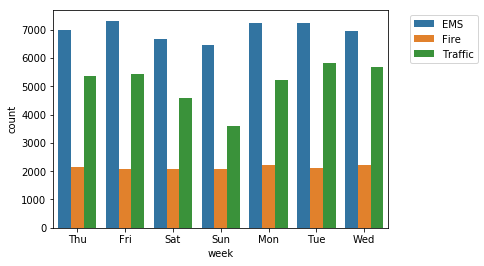

In [42]:
sns.countplot(df['week'],hue = df['Category'])
# move the legend to a proper position
plt.legend(bbox_to_anchor=(1.05,1))

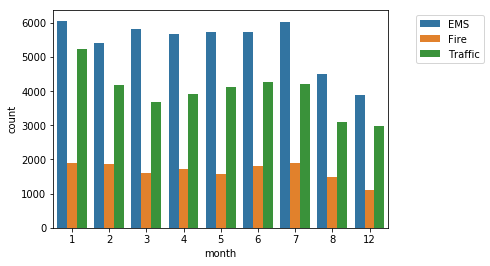

In [47]:
#Also for the month
sns.countplot(df['month'],hue = df['Category'])
plt.legend(bbox_to_anchor=(1.3,1))

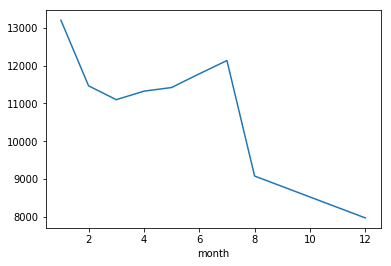

In [49]:
#we can see that the month 9,10,11 are missing in the graph
#so create a line graph to try to predict these data
df.groupby('month').count()['e'].plot()

To have a better result, we can plot a lmplot and build a linear regression.

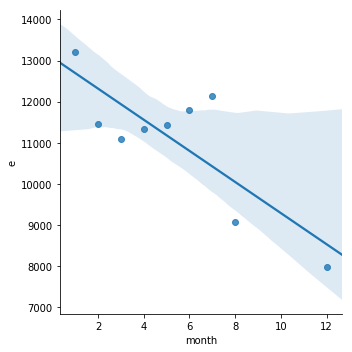

In [82]:
df1 = df.groupby('month').count()
df1['month'] = df1.index
sns.lmplot(x = 'month', y = 'e', data = df1)

Furthermore, we can add another column as 'Date' to look at the data per day.

In [83]:
df['date'] = df['timeStamp'].apply(lambda x:x.date())

In [59]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Category,hour,month,week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


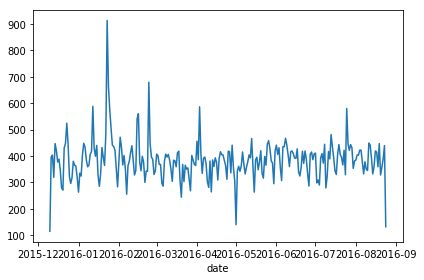

In [64]:
df.groupby('date').count()['e'].plot()
plt.tight_layout()

In [65]:
#And seperate them in the graph by different calling categories

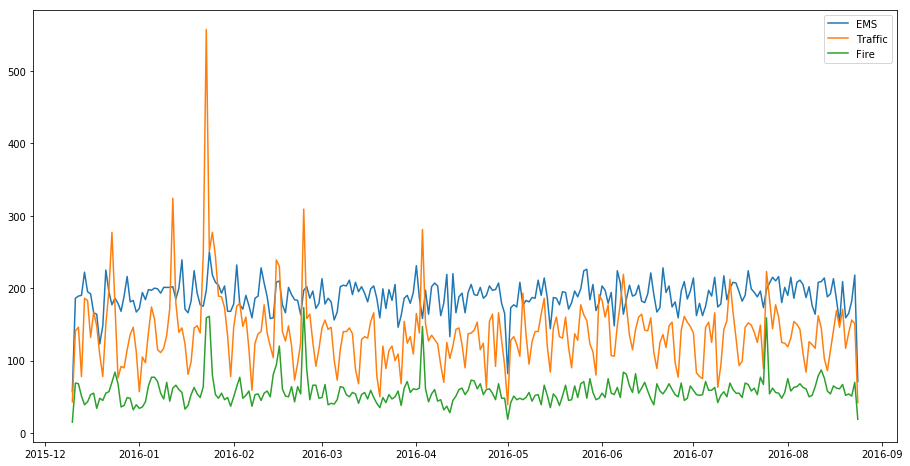

In [72]:
fig = plt.figure(figsize = (12,6))
axes = fig.add_axes([0,0,1,1])
axes.plot(df[df['Category']== 'EMS'].groupby('date').count()['e'],label = 'EMS')
axes.plot(df[df['Category']== 'Traffic'].groupby('date').count()['e'], label = 'Traffic')
axes.plot(df[df['Category']== 'Fire'].groupby('date').count()['e'], label = 'Fire')
plt.legend()

As we can see above, the Traffic category has a surge between 2016-01 to 2016-02, 

while generally EMS is the highest reason for calls.

Also, we can obseve that the increase of Fire calls sometimes related to the Traffic calls, So let's check their correaltions

In [85]:
df5 = df[df['Category']== 'Traffic'].groupby('date').count()
df5['Traffic'] = df5['e']
df5['Fire'] = df[df['Category']== 'Fire'].groupby('date').count()['e']
df5[['Traffic','Fire']].corr()

,Traffic,Fire
Traffic,1.000000,0.635758
Fire,0.635758,1.000000


In [91]:
#Now lets look into the data with both hours and month
ndf = pd.pivot_table(data = df, index = 'week',values = 'e', columns = 'hour', aggfunc = np.sum)


In [92]:
ndf

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


In [95]:
#For the record, here is another way to transfer this form
df.groupby(['week','hour']).count().unstack()['e']


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


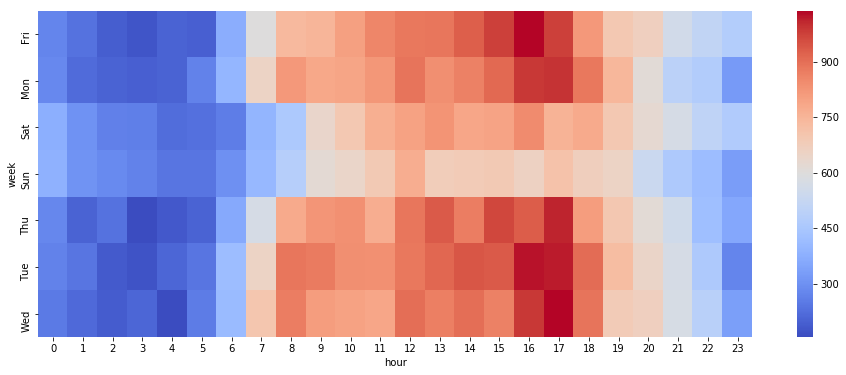

In [100]:
#Now lets create the heatmap for this
plt.figure(figsize = (16,6))
sns.heatmap(ndf,cmap = 'coolwarm')

From the graph we can see that during weekdays 16:00 - 18:00, calls are more frequent.

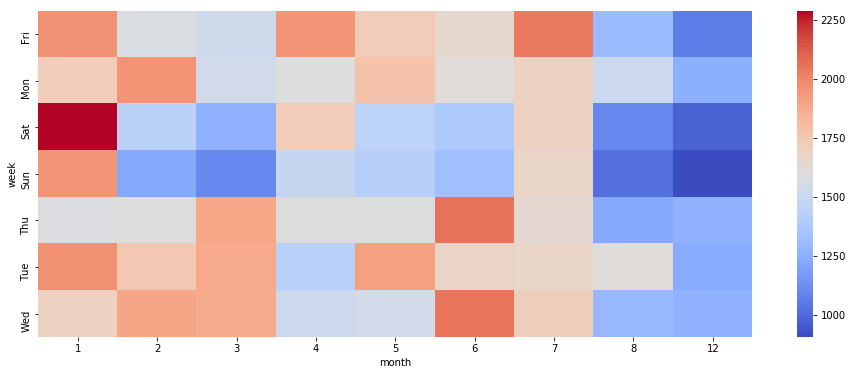

In [103]:
#As for the months
plt.figure(figsize = (16,6))
sns.heatmap(df.groupby(['week','month']).count().unstack()['e'],cmap = 'coolwarm')
